In [82]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

/home/denismoroz/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [114]:
df=pd.read_csv("base.csv")

In [115]:
df.head()

,Month,Day,Version,Shop,Hour,Volume
0,8,1,actual,Total,1,4930.90
1,8,1,actual,KP,1,2315.77
2,8,1,actual,MP,1,2615.13
3,8,1,actual,unbalance,1,-621.90
4,8,1,plan,Total,1,4309.00


In [116]:
df["Date"]=df["Month"].astype(str)+"/"+df["Day"].astype(str)+"/2019"

In [117]:
df.head()

,Month,Day,Version,Shop,Hour,Volume,Date
0,8,1,actual,Total,1,4930.90,8/1/2019
1,8,1,actual,KP,1,2315.77,8/1/2019
2,8,1,actual,MP,1,2615.13,8/1/2019
3,8,1,actual,unbalance,1,-621.90,8/1/2019
4,8,1,plan,Total,1,4309.00,8/1/2019


In [118]:
df["Time"]=df["Hour"].astype(str)+":00:00"

In [120]:
df=df.dropna()
df.tail()

,Month,Day,Version,Shop,Hour,Volume,Date,Time
20820,11,24,actual,MP,30,1951.97,11/24/2019,30:00:00
20821,11,24,actual,unbalance,30,117.73,11/24/2019,30:00:00
20822,11,24,plan,Total,30,5000.00,11/24/2019,30:00:00
20823,11,24,plan,KP,30,2600.00,11/24/2019,30:00:00
20824,11,24,plan,MP,30,2400.00,11/24/2019,30:00:00


In [121]:
df.Date=pd.to_datetime(df.Date)
df.Time=pd.to_timedelta(df.Time)
df["Timeindex"]=df.Date+df.Time
df["Timeindex"]=pd.to_datetime(df["Timeindex"])

In [122]:
df.head()

,Month,Day,Version,Shop,Hour,Volume,Date,Time,Timeindex
0,8,1,actual,Total,1,4930.90,2019-08-01,01:00:00,2019-08-01 01:00:00
1,8,1,actual,KP,1,2315.77,2019-08-01,01:00:00,2019-08-01 01:00:00
2,8,1,actual,MP,1,2615.13,2019-08-01,01:00:00,2019-08-01 01:00:00
3,8,1,actual,unbalance,1,-621.90,2019-08-01,01:00:00,2019-08-01 01:00:00
4,8,1,plan,Total,1,4309.00,2019-08-01,01:00:00,2019-08-01 01:00:00


In [135]:
ser=df[df.Shop=="Total"]
ser=ser[ser.Version=="actual"]
ser=ser[["Timeindex","Volume"]]
ser=ser.set_index("Timeindex")

In [136]:
ser.head()

,Volume
Timeindex,
2019-08-01 01:00:00,4930.90
2019-08-01 02:00:00,4738.25
2019-08-01 03:00:00,4673.54
2019-08-01 04:00:00,4878.95
2019-08-01 05:00:00,4639.85


Drawing and analysis

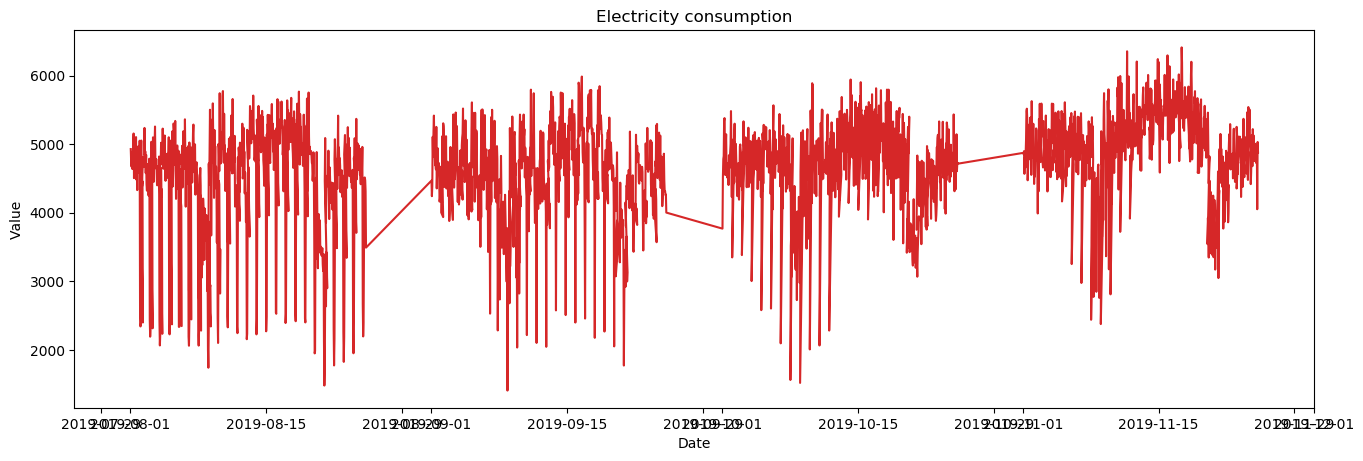

In [137]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(ser, x=ser.index, y=ser.Volume, title='Electricity consumption') 

In [141]:
 #Multiplicative Decomposition 
result_mul = seasonal_decompose(ser, model='multiplicative',freq=1)

# Additive Decomposition
result_add = seasonal_decompose(ser, model='additive', freq=1)